<a href="https://colab.research.google.com/github/StenioMedeiros/C-lculo-de-M-tricas-de-Avalia-o-de-Aprendizado/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [3]:
# Gerar dados sintéticos para classificação binária
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


In [4]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva


In [7]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
VP = cm[1, 1]
VN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [8]:
# Calcular as métricas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
sensibilidade = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)
especificidade = VN / (VN + FP)

In [11]:
# Exibir a matriz de confusão e as métricas
print("Matriz de Confusão:")
print(cm)


Matriz de Confusão:
[[127  18]
 [ 27 128]]


In [13]:

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Sensibilidade (Recall): {sensibilidade:.2f}")
print(f"Especificidade: {especificidade:.2f}")
print(f"F-score: {fscore:.2f}")

Acurácia: 0.85
Precisão: 0.88
Sensibilidade (Recall): 0.83
Especificidade: 0.88
F-score: 0.85


In [14]:
# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

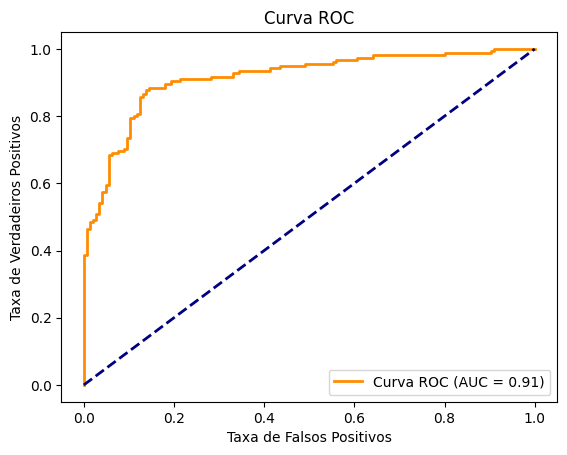

In [15]:
# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()